In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from collections import Counter

In [2]:
data = pd.read_csv('./framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data_fix = data.copy()
# fill data
mean_imputer = SimpleImputer(strategy='mean')
data_fix.iloc[:, :] = mean_imputer.fit_transform(data_fix)

In [4]:
from pycaret.classification import *
clf1 = setup(data=data_fix, target='TenYearCHD', silent=True, verbose=False) 

In [5]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8460,0.7267,0.0624,0.5753,0.1105,0.0840,0.1475,0.9140
lda,Linear Discriminant Analysis,0.8450,0.7238,0.0904,0.5320,0.1516,0.1130,0.1678,0.0140
ridge,Ridge Classifier,0.8446,0.0000,0.0150,0.2417,0.0281,0.0229,0.0522,0.0120
rf,Random Forest Classifier,0.8406,0.6859,0.0409,0.3983,0.0731,0.0475,0.0851,0.2700
gbc,Gradient Boosting Classifier,0.8386,0.6983,0.0688,0.3809,0.1133,0.0743,0.1060,0.2060
et,Extra Trees Classifier,0.8379,0.6860,0.0279,0.3300,0.0511,0.0266,0.0540,0.2480
ada,Ada Boost Classifier,0.8359,0.6888,0.0797,0.3643,0.1279,0.0810,0.1084,0.1040
lightgbm,Light Gradient Boosting Machine,0.8301,0.6547,0.0923,0.3381,0.1445,0.0846,0.1063,0.1820
knn,K Neighbors Classifier,0.8241,0.6216,0.0900,0.3053,0.1375,0.0710,0.0883,0.0350
qda,Quadratic Discriminant Analysis,0.8214,0.7095,0.1762,0.3548,0.2330,0.1465,0.1583,0.0120


In [6]:
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.7107,0.0652,0.7500,0.1200,0.0976,0.1922
1,0.8620,0.7453,0.1489,0.8750,0.2545,0.2186,0.3267
2,0.8283,0.5880,0.0426,0.2500,0.0727,0.0280,0.0418
3,0.8384,0.7446,0.0213,0.3333,0.0400,0.0214,0.0485
4,0.8485,0.6958,0.0638,0.7500,0.1176,0.0952,0.1894
5,0.8451,0.7234,0.0426,0.6667,0.0800,0.0622,0.1407
6,0.8451,0.7118,0.0851,0.5714,0.1481,0.1117,0.1759
7,0.8547,0.7588,0.1304,0.6667,0.2182,0.1763,0.2499
8,0.8345,0.7342,0.0000,0.0000,0.0000,-0.0194,-0.0434
9,0.8480,0.7153,0.0870,0.5714,0.1509,0.1146,0.1787


In [7]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 
# select best model 
best = automl()
# type of model
best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8620,0.0000,0.1087,1.0000,0.1961,0.1709,0.3057
1,0.8552,0.0000,0.1064,0.8333,0.1887,0.1585,0.2656
2,0.8451,0.0000,0.0426,0.6667,0.0800,0.0622,0.1407
3,0.8418,0.0000,0.0213,0.5000,0.0408,0.0283,0.0771
4,0.8451,0.0000,0.0213,1.0000,0.0417,0.0353,0.1341
5,0.8350,0.0000,0.0426,0.3333,0.0755,0.0411,0.0689
6,0.8418,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8514,0.0000,0.0870,0.6667,0.1538,0.1224,0.2030
8,0.8480,0.0000,0.0217,1.0000,0.0426,0.0362,0.1357
9,0.8480,0.0000,0.0652,0.6000,0.1176,0.0899,0.1609


LogisticRegression(C=6.253, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8087, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

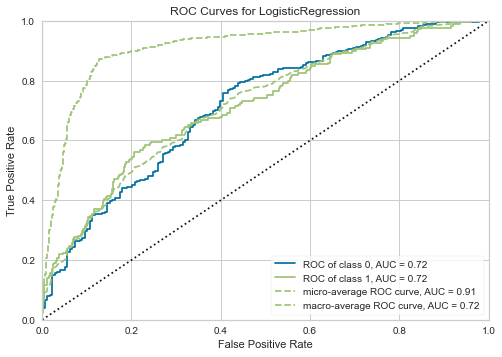

In [8]:
# AUC-ROC plot
plot_model(best, plot='auc')

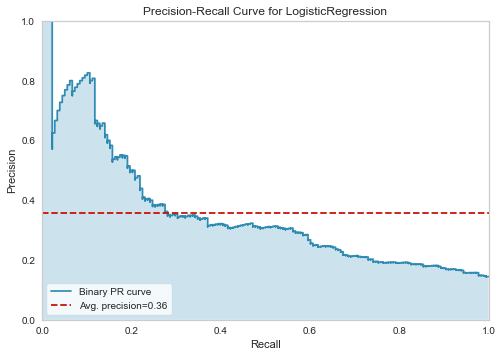

In [9]:
# Precision Recall Curve
plot_model(best, plot='pr')

In [10]:
import pickle

#Serialize mô hình
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best, f)


In [11]:
#Check the pickle file by inputing the variables
model = pickle.load(open('trained_model.pkl','rb'))
# predict from the data
pred = predict_model(model, pd.DataFrame(data=[[0, 61, 3.0, 1, 30.0, 0.0, 0, 1, 0, 225.0, 150.0, 95.0, 28.58, 65.0, 103.0]], 
                                         columns=data.columns.drop("TenYearCHD")))
pred_proba = pred["Score"][0] if pred["Label"][0] == "1.0" else 1 - pred["Score"][0]
print(pred_proba)

0.8459
